In [1]:
import pandas as pd
from datetime import datetime

# Sample dataset with data quality issues
data = {
    'ID': [1, 2, 3, 4, 5],
    'Date': ['01.02.23', '02.02.23', '03.02.23', '04.02.23', '05.02.23'],
    'Value': [10, 20, '30', 40, 50],
    'Category': ['A', 'B', 'A', 'C', 'B'],
    'SymbolColumn': ['@', '!', '$', '#', '%'],
}

df = pd.DataFrame(data)

# Data Preprocessing Steps
# 1. Handling Missing Data
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%y', errors='coerce')  # Convert to datetime

# 2. Correcting Data Types
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')  # Convert to numeric and handle non-numeric values

# 3. Removing Duplicates
df = df.drop_duplicates()

# 4. Handling Symbols
df['SymbolColumn'] = df['SymbolColumn'].str.replace('[^a-zA-Z0-9]', '', regex=True)  # Remove symbols

# 5. Encoding Categorical Data
df = pd.get_dummies(df, columns=['Category'], prefix=['Category'])  # One-hot encoding for categorical data

# 6. Handling Missing Data Again (if any)
df.dropna(subset=['Date', 'Value'], inplace=True)

# 7. Reset Index
df = df.reset_index(drop=True)

# The preprocessed DataFrame
df



,ID,Date,Value,SymbolColumn,Category_A,Category_B,Category_C
0,1,2023-02-01,10,,1,0,0
1,2,2023-02-02,20,,0,1,0
2,3,2023-02-03,30,,1,0,0
3,4,2023-02-04,40,,0,0,1
4,5,2023-02-05,50,,0,1,0


In [2]:
import pandas as pd
import numpy as np

# Create a sample dataset with missing values
data = {
    'ID': range(1, 11),
    'Value1': [5, 8, np.nan, 7, 12, 14, np.nan, 20, 15, np.nan],
    'Value2': [11, 14, 16, np.nan, 19, np.nan, 22, np.nan, np.nan, 25],
    'Category': ['A', 'B', 'A', 'B', 'C', 'A', 'C', 'B', 'A', 'C'],
}

df = pd.DataFrame(data)

# Data Preprocessing Steps
# 1. Handling Missing Data
# Impute missing values in 'Value1' and 'Value2' with the mean
df['Value1'].fillna(df['Value1'].mean(), inplace=True)
df['Value2'].fillna(df['Value2'].mean(), inplace=True)

# 2. Handling Missing Data with Other Strategies
# Impute missing values in 'Value1' and 'Value2' with the mode and median, respectively
df['Value1_mode'] = df['Value1'].fillna(df['Value1'].mode()[0])
df['Value2_median'] = df['Value2'].fillna(df['Value2'].median())

# Impute missing values with the previous value (forward fill)
df['Value1_ffill'] = df['Value1'].fillna(method='ffill')
df['Value2_ffill'] = df['Value2'].fillna(method='ffill')

# Impute missing values with the next value (backward fill)
df['Value1_bfill'] = df['Value1'].fillna(method='bfill')
df['Value2_bfill'] = df['Value2'].fillna(method='bfill')

# The preprocessed DataFrame
df


,ID,Value1,Value2,Category,Value1_mode,Value2_median,Value1_ffill,Value2_ffill,Value1_bfill,Value2_bfill
0,1,5.000000,11.000000,A,5.000000,11.000000,5.000000,11.000000,5.000000,11.000000
1,2,8.000000,14.000000,B,8.000000,14.000000,8.000000,14.000000,8.000000,14.000000
2,3,11.571429,16.000000,A,11.571429,16.000000,11.571429,16.000000,11.571429,16.000000
3,4,7.000000,17.833333,B,7.000000,17.833333,7.000000,17.833333,7.000000,17.833333
4,5,12.000000,19.000000,C,12.000000,19.000000,12.000000,19.000000,12.000000,19.000000
5,6,14.000000,17.833333,A,14.000000,17.833333,14.000000,17.833333,14.000000,17.833333
6,7,11.571429,22.000000,C,11.571429,22.000000,11.571429,22.000000,11.571429,22.000000
7,8,20.000000,17.833333,B,20.000000,17.833333,20.000000,17.833333,20.000000,17.833333
8,9,15.000000,17.833333,A,15.000000,17.833333,15.000000,17.833333,15.000000,17.833333
9,10,11.571429,25.000000,C,11.571429,25.000000,11.571429,25.000000,11.571429,25.000000


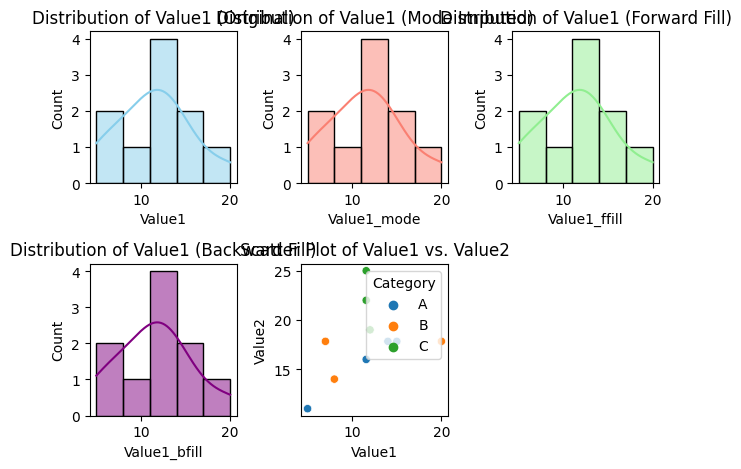

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of 'Value1' after imputation
plt.subplot(2, 3, 1)
sns.histplot(df['Value1'], kde=True, color='skyblue')
plt.title('Distribution of Value1 (Original)')

plt.subplot(2, 3, 2)
sns.histplot(df['Value1_mode'], kde=True, color='salmon')
plt.title('Distribution of Value1 (Mode Imputed)')

plt.subplot(2, 3, 3)
sns.histplot(df['Value1_ffill'], kde=True, color='lightgreen')
plt.title('Distribution of Value1 (Forward Fill)')

plt.subplot(2, 3, 4)
sns.histplot(df['Value1_bfill'], kde=True, color='purple')
plt.title('Distribution of Value1 (Backward Fill)')

# 2. Scatter plot of 'Value1' vs. 'Value2'
plt.subplot(2, 3, 5)
sns.scatterplot(x='Value1', y='Value2', data=df, hue='Category')
plt.title('Scatter Plot of Value1 vs. Value2')

# Show the plots
plt.tight_layout()
plt.show()


# **LOC**

In [4]:
import pandas as pd

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, 30, 22, 35, 28],
    'City': ['New York', 'San Francisco', 'Los Angeles', 'Chicago', 'Miami']
}

df = pd.DataFrame(data)
df.set_index('Name', inplace=True)  # Set 'Name' as the index


In [6]:
#Select a single row by label (e.g., 'Alice'):
alice_data = df.loc['Alice']
alice_data


Age           25
City    New York
Name: Alice, dtype: object

In [7]:
#Select multiple rows by labels (e.g., 'Alice' and 'Charlie'):
selected_data = df.loc[['Alice', 'Charlie']]
selected_data

,Age,City
Name,,
Alice,25,New York
Charlie,22,Los Angeles


In [8]:
#Select a single cell by label (e.g., 'Bob' and 'Age'):
bob_age = df.loc['Bob', 'Age']
bob_age

30

In [10]:
#Select a column by label (e.g., 'Age'):
ages = df.loc[:, 'Age']
ages

Name
Alice      25
Bob        30
Charlie    22
David      35
Eve        28
Name: Age, dtype: int64

## ILOC

In [19]:
#Select a column by integer position (e.g., the second column):
cities = df.iloc[:, 1]
cities

Name
Alice           New York
Bob        San Francisco
Charlie      Los Angeles
David            Chicago
Eve                Miami
Name: City, dtype: object

In [20]:
#Select a single cell by integer positions (e.g., the second row and the first column):
cell_value = df.iloc[1, 0]
cell_value

30

In [21]:
#Select multiple rows by integer positions (e.g., the first and third rows):
selected_rows = df.iloc[[0, 2]]
selected_rows

,Age,City
Name,,
Alice,25,New York
Charlie,22,Los Angeles


In [22]:
#Select a single row by integer position (e.g., the first row):
first_row = df.iloc[0]
first_row

Age           25
City    New York
Name: Alice, dtype: object